In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disneyland-reviews/DisneylandReviews.csv


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

# Uploading the Dataset

In [3]:
df=pd.read_csv("/kaggle/input/disneyland-reviews/DisneylandReviews.csv",encoding='latin1')
print(df.shape)
df.head(5)

(42656, 6)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


# Sorting according to rates

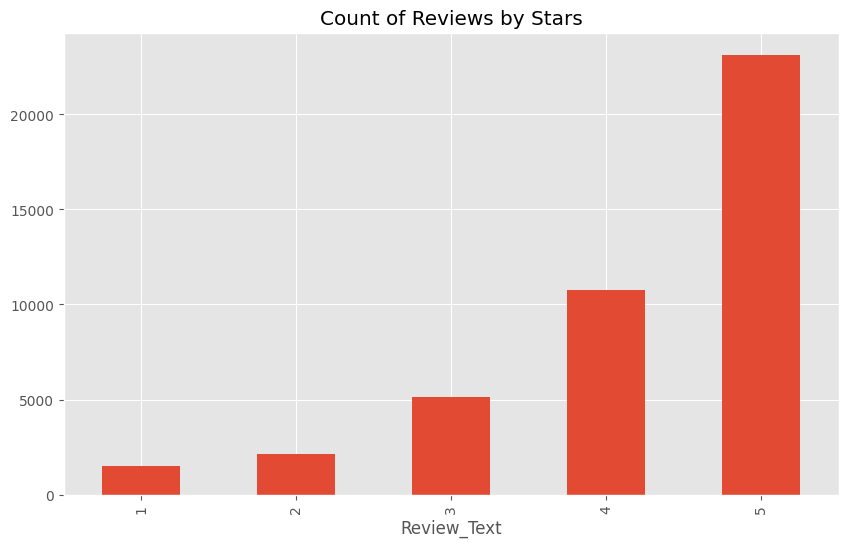

In [4]:
ax=df['Rating'].value_counts().sort_index() \
.plot(kind="bar",
       title ='Count of Reviews by Stars',
       figsize=(10,6))
ax.set_xlabel('Review_Text')
plt.show()

# Importing SentimentIntensityAnalyzer & tqdm

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sa=SentimentIntensityAnalyzer()

# Apply Sentimental Analysis on a Sample Dataset

In [6]:
sample_df = df.sample(n=10000, random_state=42).reset_index(drop=True)

In [7]:
res={}
for i,row in tqdm(sample_df.iterrows(),total=len(sample_df)):
    text=row['Review_Text']
    myid=row['Review_ID']
    res[myid]=sa.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

# DataFrame of Result

In [8]:
result_table=pd.DataFrame(res).T

In [9]:
result_table

,neg,neu,pos,compound
540713188,0.000,0.626,0.374,0.9670
119781124,0.059,0.767,0.174,0.9280
576395715,0.057,0.573,0.370,0.9186
310041955,0.000,0.669,0.331,0.9165
184009554,0.000,0.831,0.169,0.9663
...,...,...,...,...
142724802,0.050,0.654,0.295,0.9719
18852457,0.056,0.789,0.154,0.9926
120766139,0.000,0.862,0.138,0.9168
332571576,0.022,0.862,0.116,0.9909


# Calculating Accuracy 

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score


min_len = min(len(sample_df), len(result_table))
sample_df = sample_df.reset_index(drop=True).iloc[:min_len]
result_table = result_table.reset_index(drop=True).iloc[:min_len]


def compound_to_sentiment(compound):
    if compound >= 0.05:
        return 2  # positive
    elif compound <= -0.05:
        return 0  # negative
    else:
        return 1  # neutral

predicted_labels = result_table['compound'].apply(compound_to_sentiment).values


def rating_to_sentiment(rating):
    if rating <= 2:
        return 0  # negative
    elif rating == 3:
        return 1  # neutral
    else:
        return 2  # positive

true_labels = sample_df['Rating'].apply(rating_to_sentiment).values


accuracy = accuracy_score(true_labels, predicted_labels)
print("VADER Accuracy:", accuracy)


VADER Accuracy: 0.7631763176317632


# Small Example

In [11]:
sa.polarity_scores("I am doing well")

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}